<a href="https://colab.research.google.com/github/jcj217-mc/Data_205/blob/main/Data205Project_CPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# import packages
import pandas as pd
import numpy as np
import os 
import json

In [3]:
# tab-separated data into pandas data frame.
df = pd.read_json('https://data.montgomerycountymd.gov/resource/sari-cs3z.json')  

In [4]:
df.head()

,month,shift_1,shift_2,shift_3,traffic,criminal,released_personal_recognizance,released_unsecured_bond,committed_with_bond,district_court_bench_warrant,district_court_arrest_warrant,on_view_arrest_soc,circuit_court_warrant
0,2021-02-01T00:00:00.000,115,100,139,28,326,27.0,108.0,130.0,92.0,107.0,121.0,25.0
1,2021-01-01T00:00:00.000,123,127,135,25,360,70.0,92.0,160.0,102.0,91.0,159.0,22.0
2,2020-12-01T00:00:00.000,143,148,138,41,388,57.0,105.0,207.0,121.0,115.0,151.0,14.0
3,2020-11-01T00:00:00.000,141,113,125,39,340,53.0,108.0,162.0,129.0,74.0,145.0,15.0
4,2020-10-01T00:00:00.000,165,161,180,61,445,75.0,145.0,180.0,162.0,140.0,166.0,29.0


In [5]:
# Checking data types for each column
print(df.dtypes)

month                              object
shift_1                             int64
shift_2                             int64
shift_3                             int64
traffic                             int64
criminal                            int64
released_personal_recognizance    float64
released_unsecured_bond           float64
committed_with_bond               float64
district_court_bench_warrant      float64
district_court_arrest_warrant     float64
on_view_arrest_soc                float64
circuit_court_warrant             float64
dtype: object


In [6]:
# Removing time from date
df['month'] = pd.to_datetime(df['month']).dt.date

In [7]:
df.head()

,month,shift_1,shift_2,shift_3,traffic,criminal,released_personal_recognizance,released_unsecured_bond,committed_with_bond,district_court_bench_warrant,district_court_arrest_warrant,on_view_arrest_soc,circuit_court_warrant
0,2021-02-01,115,100,139,28,326,27.0,108.0,130.0,92.0,107.0,121.0,25.0
1,2021-01-01,123,127,135,25,360,70.0,92.0,160.0,102.0,91.0,159.0,22.0
2,2020-12-01,143,148,138,41,388,57.0,105.0,207.0,121.0,115.0,151.0,14.0
3,2020-11-01,141,113,125,39,340,53.0,108.0,162.0,129.0,74.0,145.0,15.0
4,2020-10-01,165,161,180,61,445,75.0,145.0,180.0,162.0,140.0,166.0,29.0


In [8]:
# create new "total" column with "traffic" + "criminal"
total = []
for index, row in df.iterrows(): 
      total.append(row.traffic + row.criminal)

In [9]:
 df['total'] = total

In [10]:
df.head(1)

,month,shift_1,shift_2,shift_3,traffic,criminal,released_personal_recognizance,released_unsecured_bond,committed_with_bond,district_court_bench_warrant,district_court_arrest_warrant,on_view_arrest_soc,circuit_court_warrant,total
0,2021-02-01,115,100,139,28,326,27.0,108.0,130.0,92.0,107.0,121.0,25.0,354


In [11]:
df.head(1)

,month,shift_1,shift_2,shift_3,traffic,criminal,released_personal_recognizance,released_unsecured_bond,committed_with_bond,district_court_bench_warrant,district_court_arrest_warrant,on_view_arrest_soc,circuit_court_warrant,total
0,2021-02-01,115,100,139,28,326,27.0,108.0,130.0,92.0,107.0,121.0,25.0,354


In [12]:
# Change column names with rename() function
df = df.rename(columns = {"month": "date", "released_personal_recognizance": "RPR", "released_unsecured_bond":"released_bond", "committed_with_bond":"Committed", "district_court_bench_warrant" : "dc_bench_warrant", "district_court_arrest_warrant": "dc_arrest_warrant", "on_view_arrest_soc": "PC_arrest", "circuit_court_warrant": 'cir_ct_warrant'})

In [13]:
df.describe()

,shift_1,shift_2,shift_3,traffic,criminal,RPR,released_bond,Committed,dc_bench_warrant,dc_arrest_warrant,PC_arrest,cir_ct_warrant,total
count,56.000000,56.000000,56.000000,56.000000,56.00000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,56.000000
mean,264.464286,233.017857,298.071429,149.446429,691.87500,151.500000,179.440000,255.160000,319.52000,146.000000,265.520000,41.020000,841.321429
std,74.419930,61.041414,79.629793,62.904522,192.50474,59.311096,55.143657,60.466675,118.27247,34.912719,63.750227,19.302628,251.183968
min,90.000000,90.000000,103.000000,25.000000,257.00000,27.000000,65.000000,130.000000,77.00000,36.000000,121.000000,14.000000,283.000000
25%,247.250000,224.000000,289.250000,137.000000,639.25000,126.000000,145.250000,210.500000,290.25000,133.250000,248.000000,34.250000,785.500000
50%,288.000000,255.000000,329.000000,169.000000,717.50000,163.500000,176.000000,274.500000,365.50000,151.000000,293.000000,41.500000,897.000000
75%,319.500000,270.250000,348.750000,194.250000,813.50000,196.750000,213.000000,296.250000,396.00000,172.250000,307.750000,46.750000,997.750000
max,349.000000,310.000000,405.000000,247.000000,983.00000,261.000000,299.000000,357.000000,454.00000,203.000000,351.000000,146.000000,1230.000000


In [14]:
df.drop(['shift_1', 'shift_2', 'shift_3'], axis=1, inplace=True)

In [15]:
# Reordering columns to have total column after traffic and criminal
df = df[['date', 'traffic', 'criminal', 'total', 'RPR', 'released_bond', 'Committed', 'dc_bench_warrant', 'dc_arrest_warrant', 'PC_arrest', 'cir_ct_warrant']]

In [16]:
df.head()

,date,traffic,criminal,total,RPR,released_bond,Committed,dc_bench_warrant,dc_arrest_warrant,PC_arrest,cir_ct_warrant
0,2021-02-01,28,326,354,27.0,108.0,130.0,92.0,107.0,121.0,25.0
1,2021-01-01,25,360,385,70.0,92.0,160.0,102.0,91.0,159.0,22.0
2,2020-12-01,41,388,429,57.0,105.0,207.0,121.0,115.0,151.0,14.0
3,2020-11-01,39,340,379,53.0,108.0,162.0,129.0,74.0,145.0,15.0
4,2020-10-01,61,445,506,75.0,145.0,180.0,162.0,140.0,166.0,29.0


In [17]:
# create new "total released" column with "RPR" + "Released on Bond"
total_released = []
for index, row in df.iterrows(): 
      total_released.append(row.RPR + row.released_bond)

In [18]:
 df['total_released'] = total_released

In [19]:
df.head(1)

,date,traffic,criminal,total,RPR,released_bond,Committed,dc_bench_warrant,dc_arrest_warrant,PC_arrest,cir_ct_warrant,total_released
0,2021-02-01,28,326,354,27.0,108.0,130.0,92.0,107.0,121.0,25.0,135.0


In [20]:
# creating list of just release versus detention
df_release = df.drop(list(df)[7:11], axis=1)

In [21]:
df_release.head()

,date,traffic,criminal,total,RPR,released_bond,Committed,total_released
0,2021-02-01,28,326,354,27.0,108.0,130.0,135.0
1,2021-01-01,25,360,385,70.0,92.0,160.0,162.0
2,2020-12-01,41,388,429,57.0,105.0,207.0,162.0
3,2020-11-01,39,340,379,53.0,108.0,162.0,161.0
4,2020-10-01,61,445,506,75.0,145.0,180.0,220.0


In [22]:
 # Computing Percentage
df_release_1 = df_release
# for cumulative percentages in the future: df_release_1['percent_RPR'] = (df_release.RPR.sum() / df_release.total.cumsum()) * 100
df_release_1['percent_RPR'] = (df_release.RPR / df_release.total) * 100
df_release_1['percent_bond'] = (df_release_1.released_bond / df_release_1.total ) * 100
df_release_1['percent_committed'] = (df_release_1.Committed / df_release_1.total ) * 100
df_release_1['percent_released'] = ((df_release_1.released_bond + df_release_1.RPR) / df_release_1.total ) * 100
df_release_1
df_release_1.head(1)

,date,traffic,criminal,total,RPR,released_bond,Committed,total_released,percent_RPR,percent_bond,percent_committed,percent_released
0,2021-02-01,28,326,354,27.0,108.0,130.0,135.0,7.627119,30.508475,36.723164,38.135593


In [46]:
df_release_1['total_percent'] = (df_release_1.percent_committed + df_release_1.percent_released)
df_release_1.head(5)

,date,traffic,criminal,total,RPR,released_bond,Committed,total_released,percent_RPR,percent_bond,percent_committed,percent_released,total_percent
0,2021-02-01,28,326,354,27.0,108.0,130.0,135.0,7.627119,30.508475,36.723164,38.135593,74.858757
1,2021-01-01,25,360,385,70.0,92.0,160.0,162.0,18.181818,23.896104,41.558442,42.077922,83.636364
2,2020-12-01,41,388,429,57.0,105.0,207.0,162.0,13.286713,24.475524,48.251748,37.762238,86.013986
3,2020-11-01,39,340,379,53.0,108.0,162.0,161.0,13.984169,28.496042,42.744063,42.480211,85.224274
4,2020-10-01,61,445,506,75.0,145.0,180.0,220.0,14.822134,28.656126,35.573123,43.478261,79.051383


In [43]:
# In February 2021, 89 arrests unaccounted for 
27+108+130

265

In [44]:
354-265

89

In [24]:
# Create separate columns for month day and year 
df.date = pd.to_datetime(df.date)

In [47]:
df[['month', 'year']] = df.date.apply(lambda x: pd.Series(x.strftime("%m, %Y").split(",")))
df.head()

,date,month,year,traffic,criminal,total,RPR,released_bond,Committed,total_released,dc_bench_warrant,dc_arrest_warrant,PC_arrest,cir_ct_warrant
0,2021-02-01,02,2021,28,326,354,27.0,108.0,130.0,135.0,92.0,107.0,121.0,25.0
1,2021-01-01,01,2021,25,360,385,70.0,92.0,160.0,162.0,102.0,91.0,159.0,22.0
2,2020-12-01,12,2020,41,388,429,57.0,105.0,207.0,162.0,121.0,115.0,151.0,14.0
3,2020-11-01,11,2020,39,340,379,53.0,108.0,162.0,161.0,129.0,74.0,145.0,15.0
4,2020-10-01,10,2020,61,445,506,75.0,145.0,180.0,220.0,162.0,140.0,166.0,29.0


In [26]:
df.head(1)

,date,traffic,criminal,total,RPR,released_bond,Committed,dc_bench_warrant,dc_arrest_warrant,PC_arrest,cir_ct_warrant,total_released,month,year
0,2021-02-01,28,326,354,27.0,108.0,130.0,92.0,107.0,121.0,25.0,135.0,02,2021


In [27]:
# Reordering columns to have total column after traffic and criminal
df = df[['date', 'month', 'year', 'traffic', 'criminal', 'total', 'RPR', 'released_bond', 'Committed', 'total_released', 'dc_bench_warrant', 'dc_arrest_warrant', 'PC_arrest', 'cir_ct_warrant']]

In [28]:
df.head(1)

,date,month,year,traffic,criminal,total,RPR,released_bond,Committed,total_released,dc_bench_warrant,dc_arrest_warrant,PC_arrest,cir_ct_warrant
0,2021-02-01,02,2021,28,326,354,27.0,108.0,130.0,135.0,92.0,107.0,121.0,25.0


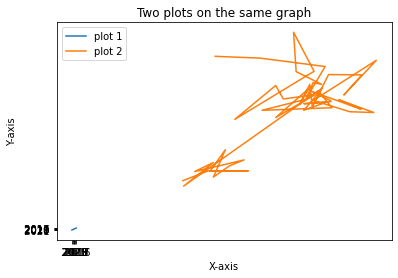

In [29]:
# Make graph comparing total released versus committed
import matplotlib.pyplot as plt

# Declaring the points for first line plot
X1 = df['year']
Y1 = df['year']
# plotting the first plot
plt.plot(X1, Y1, label = "plot 1") 
# Declaring the points for second line plot
X2 = df['Committed']
Y2 = df['total_released']
# plotting the second plot 
plt.plot(X2, Y2, label = "plot 2") 
  
# Labeling the X-axis 
plt.xlabel('X-axis') 
# Labeling the Y-axis 
plt.ylabel('Y-axis') 
# Give a title to the graph
plt.title('Two plots on the same graph') 
  
# Show a legend on the plot 
plt.legend() 
 
plt.show() 

Interesting but not what was expected!

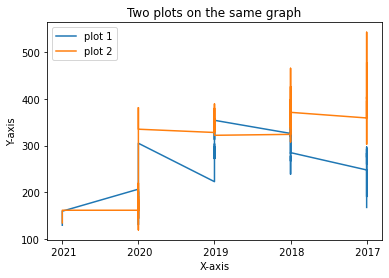

In [30]:
# Make graph comparing total released versus committed
import matplotlib.pyplot as plt

# Declaring the points for first line plot
X1 = df['year']
Y1 = df['Committed']
# plotting the first plot
plt.plot(X1, Y1, label = "plot 1") 
# Declaring the points for second line plot
X2 = df['year']
Y2 = df['total_released']
# plotting the second plot 
plt.plot(X2, Y2, label = "plot 2") 
  
# Labeling the X-axis 
plt.xlabel('X-axis') 
# Labeling the Y-axis 
plt.ylabel('Y-axis') 
# Give a title to the graph
plt.title('Two plots on the same graph') 
  
# Show a legend on the plot 
plt.legend() 
 
plt.show() 

again, cool, but not quite what was expected

In [31]:
# Creating Dataset just based on arrest cause - Warrant or PC
df_warrant = df.drop(list(df)[3:5], axis=1)

In [32]:
df_warrant.head(1)

,date,month,year,total,RPR,released_bond,Committed,total_released,dc_bench_warrant,dc_arrest_warrant,PC_arrest,cir_ct_warrant
0,2021-02-01,02,2021,354,27.0,108.0,130.0,135.0,92.0,107.0,121.0,25.0


In [33]:
df_warrant2 = df_warrant.drop(list(df_warrant)[4:8], axis = 1)

In [34]:
df_warrant2.head()

,date,month,year,total,dc_bench_warrant,dc_arrest_warrant,PC_arrest,cir_ct_warrant
0,2021-02-01,02,2021,354,92.0,107.0,121.0,25.0
1,2021-01-01,01,2021,385,102.0,91.0,159.0,22.0
2,2020-12-01,12,2020,429,121.0,115.0,151.0,14.0
3,2020-11-01,11,2020,379,129.0,74.0,145.0,15.0
4,2020-10-01,10,2020,506,162.0,140.0,166.0,29.0


In [36]:
df_warrant2['percent_PC'] = (df_warrant2.PC_arrest / df_warrant2.total) * 100
df_warrant2.head()

,date,month,year,total,dc_bench_warrant,dc_arrest_warrant,PC_arrest,cir_ct_warrant,percent_PC
0,2021-02-01,02,2021,354,92.0,107.0,121.0,25.0,34.180791
1,2021-01-01,01,2021,385,102.0,91.0,159.0,22.0,41.298701
2,2020-12-01,12,2020,429,121.0,115.0,151.0,14.0,35.198135
3,2020-11-01,11,2020,379,129.0,74.0,145.0,15.0,38.258575
4,2020-10-01,10,2020,506,162.0,140.0,166.0,29.0,32.806324


In [39]:
df_warrant2['percent_warrant'] = ((df_warrant2.dc_bench_warrant + df_warrant2.dc_arrest_warrant + df_warrant2.cir_ct_warrant)/ df_warrant2.total) * 100
df_warrant2.head(1)

,date,month,year,total,dc_bench_warrant,dc_arrest_warrant,PC_arrest,cir_ct_warrant,percent_PC,percent_warrant
0,2021-02-01,02,2021,354,92.0,107.0,121.0,25.0,34.180791,63.276836


In [40]:
df_warrant2['percent total'] = (df_warrant2.percent_PC + df_warrant2.percent_warrant)
df_warrant2.head(1)

,date,month,year,total,dc_bench_warrant,dc_arrest_warrant,PC_arrest,cir_ct_warrant,percent_PC,percent_warrant,percent total
0,2021-02-01,02,2021,354,92.0,107.0,121.0,25.0,34.180791,63.276836,97.457627


In [41]:
# 10 arrests are unaccounted for
92+107+121+25

345